<a href="https://colab.research.google.com/github/FernandoKSalesi/ProjetoDataScience/blob/main/Principal_Data_Science_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando as bibliotecas


In [ ]:
!pip install pandas matplotlib seaborn scikit-learn


# Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from datetime import datetime
from joblib import dump


#gdown, os e zipfile são utilizados para baixar o arquivo zip do Google Drive e extrair o csv
import gdown
import os
import zipfile
import time

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# imports para os mapas
from shapely.geometry import Point
import geopandas as gpd
import folium

from urllib.request import urlretrieve
np.random.seed(0)

# Download Dataframe

In [ ]:
# Função para fazer o download, extrair e carregar o dataset
def download_extract_load_csv(url, output):
    print(f"Iniciando o download de {url}...")
    gdown.download(url, output, quiet=False)

    while not os.path.exists(output):
        print(f"Aguardando o arquivo {output} ser baixado...")
        time.sleep(2)  # Verifica a cada 2 segundos se já baixou

    print("Download concluído!")

    # extrai zip
    print("Extraindo arquivos...")
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall("dados")
    #verifica se esta presente e carrega o df
    extracted_files = os.listdir("dados")
    print("Arquivos extraídos:", extracted_files)
    csv_file = [file for file in extracted_files if file.endswith(".csv")][0]
    csv_path = os.path.join("dados", csv_file)
    print("Carregando o CSV...")
    df = pd.read_csv(csv_path, encoding='latin-1', sep=';', on_bad_lines='skip')

    return df

# junta todos os datasets
def juntar_datasets(datasets):
    # usa pd.concat pra concatenar os datasets
    df_concatenado = pd.concat(datasets, ignore_index=True)
    return df_concatenado

# URLs de todos os datasets 2018 até 2024
urls_ou_outros_datasets = [
    "https://drive.google.com/uc?id=14lB0vqMFkaZj8HZ44b0njYgxs9nAN8KO",
]


#    "https://drive.google.com/uc?id=1-WO3SfNrwwZ5_l7fRTiwBKRw7mi1-HUq",
#    "https://drive.google.com/uc?id=1PRQjuV5gOn_nn6UNvaJyVURDIfbSAK4-",
#    "https://drive.google.com/uc?id=12xH8LX9aN2gObR766YN3cMcuycwyCJDz",
#    "https://drive.google.com/uc?id=1esu6IiH5TVTxFoedv6DBGDd01Gvi8785",
#    "https://drive.google.com/uc?id=1pN3fn2wY34GH6cY-gKfbxRJJBFE0lb_l",
#    "https://drive.google.com/uc?id=1cM4IgGMIiR-u4gBIH5IEe3DcvBvUzedi",

outros_dfs = []  # Lista para armazenar todos os DataFrames

for url in urls_ou_outros_datasets:
    output = f"dados_{url.split('=')[1]}.zip"
    df = download_extract_load_csv(url, output)
    outros_dfs.append(df)

# Juntar todos os datasets
df = juntar_datasets(outros_dfs)

df_backup = df.copy()

print("Colunas do df_clean:")
print(df.columns)


Iniciando o download de https://drive.google.com/uc?id=14lB0vqMFkaZj8HZ44b0njYgxs9nAN8KO...


Downloading...
From: https://drive.google.com/uc?id=14lB0vqMFkaZj8HZ44b0njYgxs9nAN8KO
To: /content/dados_14lB0vqMFkaZj8HZ44b0njYgxs9nAN8KO.zip
100%|██████████| 3.68M/3.68M [00:00<00:00, 70.5MB/s]


Download concluído!
Extraindo arquivos...
Arquivos extraídos: ['datatran2024.csv']
Carregando o CSV...
Colunas do df_clean:
Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')


In [ ]:
for classificacao_acidente in df['classificacao_acidente'].unique():
    print(classificacao_acidente)
print("----------")

for fase_dia in df['fase_dia'].unique():
    print(fase_dia)
print("----------")

for condicao_metereologica in df['condicao_metereologica'].unique():
    print(condicao_metereologica)

nan
Com Vítimas Fatais
Com Vítimas Feridas
Sem Vítimas
----------
Plena Noite
Amanhecer
Pleno dia
Anoitecer
----------
Céu Claro
Chuva
Sol
Nublado
Garoa/Chuvisco
Ignorado
Vento
Nevoeiro/Neblina
Granizo
Neve


# Tratamento dos dados e análise de Correlação

In [ ]:
# filtrando as colunas que serão utilizadas
df = df_backup[['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'veiculos', 'fase_dia']].copy()

In [ ]:
# remove nulo
df.dropna(subset=['dia_semana', 'data_inversa', 'horario', 'pessoas'], inplace=True)

# remove duplicado
df.drop_duplicates(inplace=True)

# letra maiscula pra não ficar feio e tornando br e km em números reais dot tipo float
df['dia_semana'] = df['dia_semana'].str.title()
df['municipio'] = df['municipio'].str.title()
df['km'] = df['km'].map(lambda x: x.replace(',', '.')).astype(float)
df['br'] = df['br'].astype(int)

df.describe()

,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,veiculos
count,73154.000000,73154.000000,73154.000000,73154.000000,73154.000000,73154.000000,73154.000000,73154.000000,73154.000000
mean,209.575211,257.090484,2.597206,0.084206,0.877341,0.278098,1.048118,0.395672,1.985838
std,128.817478,226.989078,2.232588,0.372809,1.127004,0.636003,1.746519,0.822881,1.083473
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101.000000,75.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,158.000000,190.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,324.000000,402.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,495.000000,1470.000000,93.000000,37.000000,83.000000,35.000000,78.000000,33.000000,26.000000


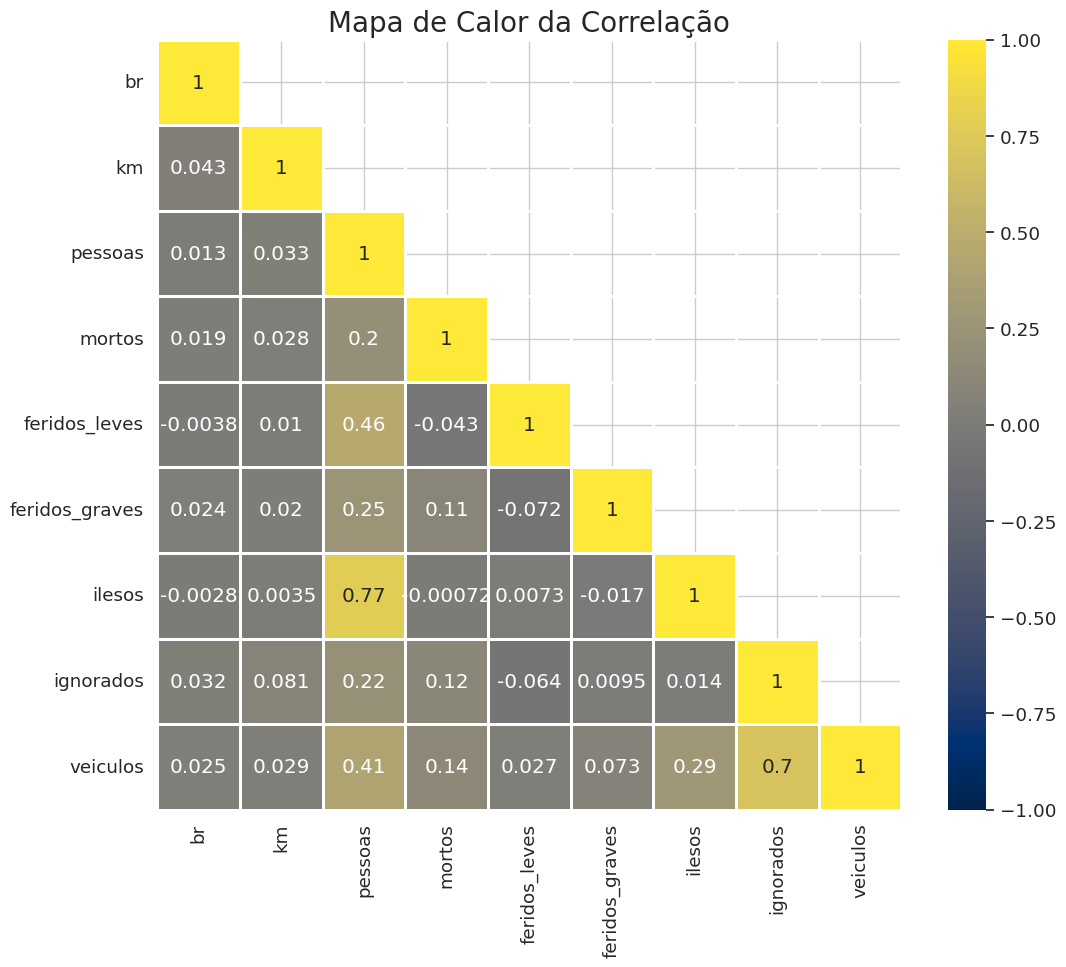

In [ ]:
# Função de correlação.

def correlacao(df):
    #pega somente dado numerico
    df_numerico = df.select_dtypes(include=[np.number])
    corr = df_numerico.corr()
    mask = np.triu(np.ones(corr.shape)).astype(bool)

    for i in range(len(mask)):
        for j in range(mask.shape[1]):
            if i == j:
                mask[i, j] = False

    sns.set(font_scale=1.2)
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 10))

    mapa_calor = sns.heatmap(corr,
                             mask=mask,
                             annot=True,
                             vmin=-1,
                             vmax=1,
                             cmap='cividis',
                             linewidths=1)
    mapa_calor.set_title('Mapa de Calor da Correlação', fontsize=20)

    plt.show()

correlacao(df)

<Figure size 500x1000 with 0 Axes>

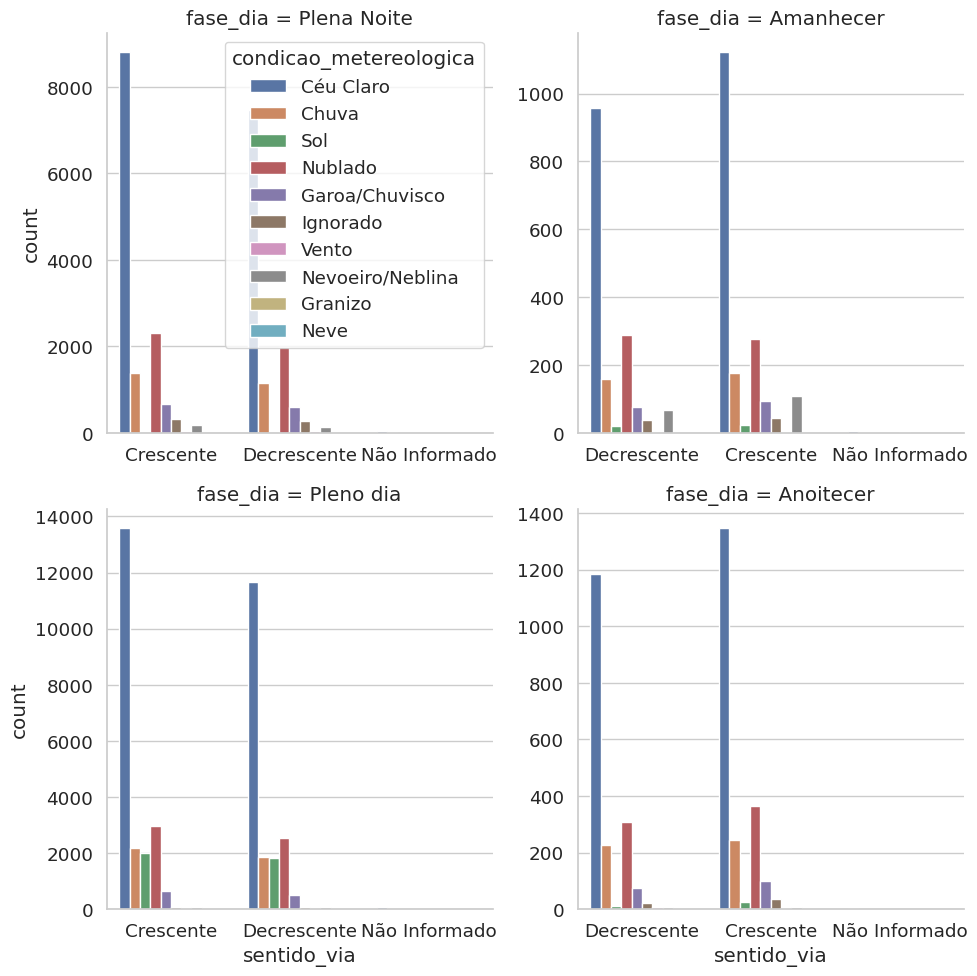

In [ ]:
plt.figure(figsize = (5,10))

ax = sns.catplot(x = 'sentido_via',
                 hue = 'condicao_metereologica',
                 col = 'fase_dia',
                 data = df,
                 kind = 'count',
                 height = 5,
                 col_wrap = 2,
                 sharex = False,
                 sharey = False,
                 legend_out=False)

plt.tight_layout()
plt.show()

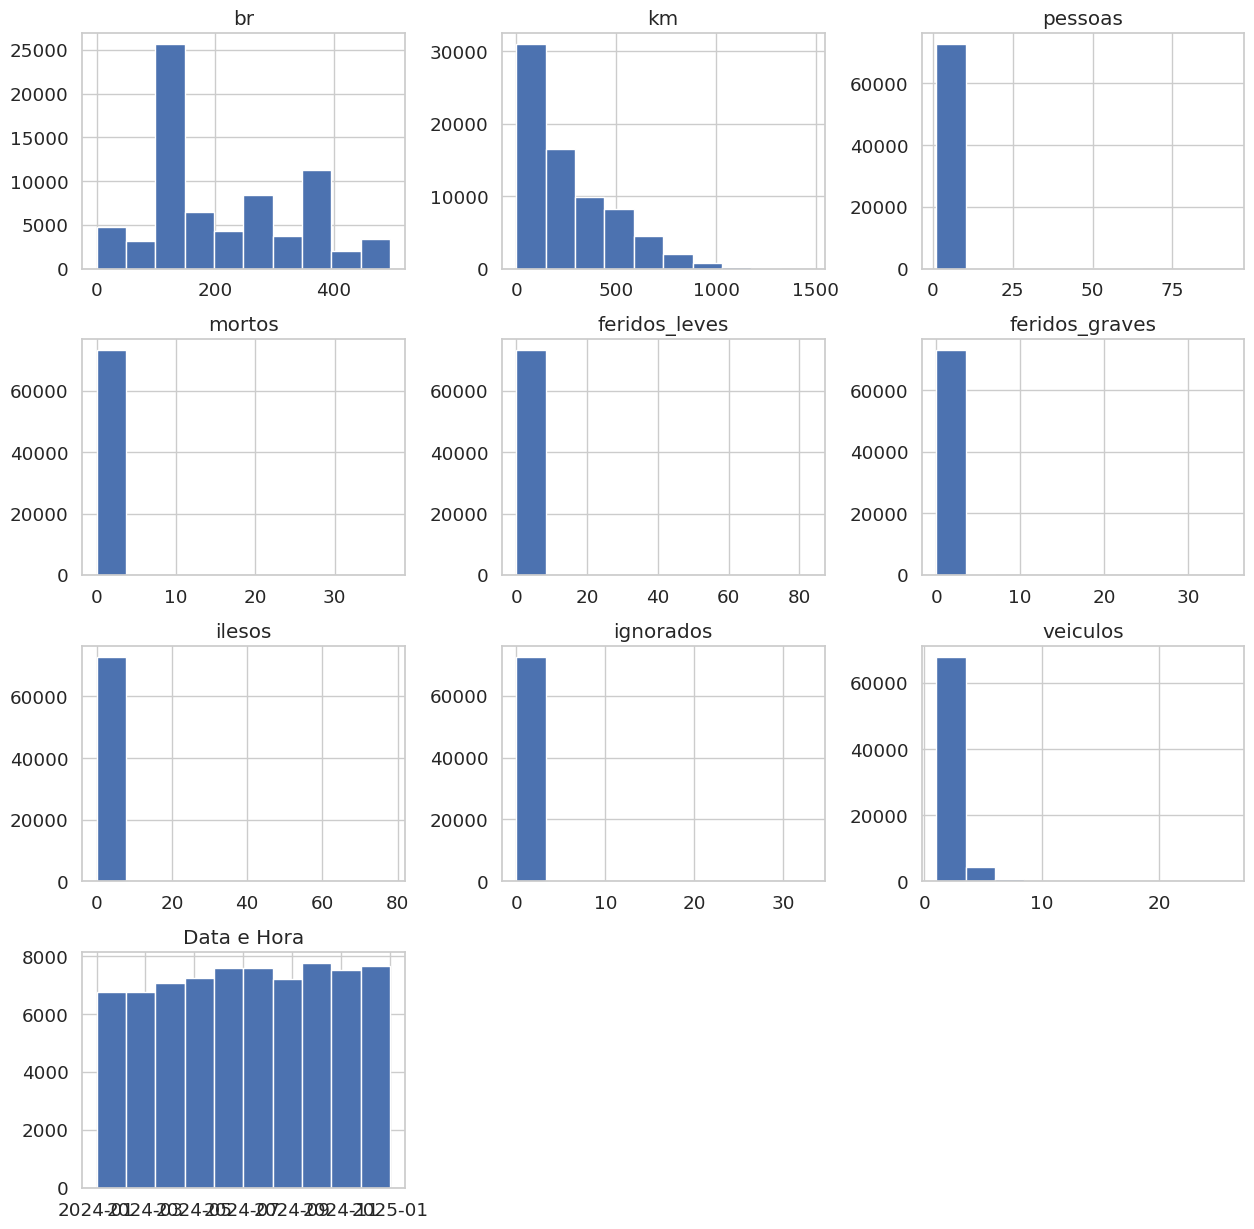

In [ ]:
df.hist(bins=10, figsize=(15, 15))
plt.show()

# Análise Temporal

In [ ]:
# Criando uma coluna com objetos datetime.
df['Data e Hora Temp'] = df['data_inversa'] + df['horario']
df['Data e Hora'] = df['Data e Hora Temp'].map(lambda x: datetime.strptime(x, '%Y-%m-%d%H:%M:%S'))

# Excluindo colunas ambíguas.
df.drop(['data_inversa', 'horario', 'Data e Hora Temp'], axis='columns', inplace=True)

# Definindo intervalos com períodos de 6 horas.
df['Intervalos de Hora'] = pd.cut(df['Data e Hora'].map(lambda x: x.hour), [0, 6, 12, 18, 24], right=False)

# Agrupando a contagem de pessoas por dia e intervalo de hora.
pessoas_dia_hora = df.groupby(['dia_semana', 'Intervalos de Hora'])['pessoas'].sum().reset_index()

# Ordenando os índices do agrupamento.
novo_indice = []
for dia in ['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo']:
    novo_indice += list(pessoas_dia_hora[pessoas_dia_hora['dia_semana'] == dia].index)

pessoas_dia_hora = pessoas_dia_hora.reindex(novo_indice, axis='index')

<ipython-input-7-1600558972>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pessoas_dia_hora = df.groupby(['dia_semana', 'Intervalos de Hora'])['pessoas'].sum().reset_index()


In [ ]:
df['Ano'] = df['Data e Hora'].dt.year
df['Mês'] = df['Data e Hora'].dt.month
df['Dia'] = df['Data e Hora'].dt.day
df['Hora'] = df['Data e Hora'].dt.hour
df['Minuto'] = df['Data e Hora'].dt.minute

df_serie_temporal_anos = df.groupby('Ano')['pessoas'].sum().reset_index()
df_serie_temporal_mensal = df.groupby(['Ano', 'Mês'])['pessoas'].sum().reset_index()

#print(df_serie_temporal_anos)
print(df_serie_temporal_mensal.head())

    Ano  Mês  pessoas
0  2024    1    15766
1  2024    2    13670
2  2024    3    14926
3  2024    4    14860
4  2024    5    15782


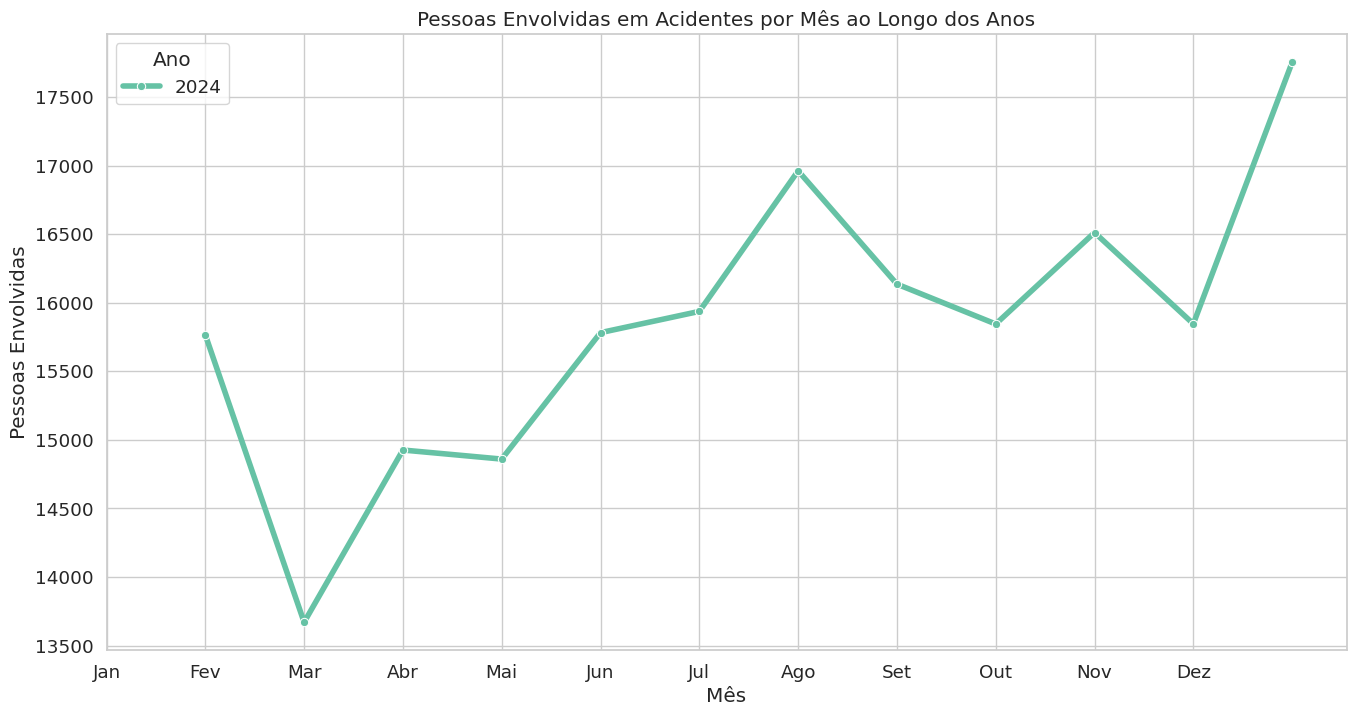

In [ ]:
plt.figure(figsize=(16, 8))

sns.lineplot(x='Mês',
             y='pessoas',
             hue='Ano',
             data=df_serie_temporal_mensal,
             marker='o',
             palette='Set2',
             linewidth=4)

plt.xlabel('Mês')
plt.ylabel('Pessoas Envolvidas')
plt.title('Pessoas Envolvidas em Acidentes por Mês ao Longo dos Anos')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

plt.show()


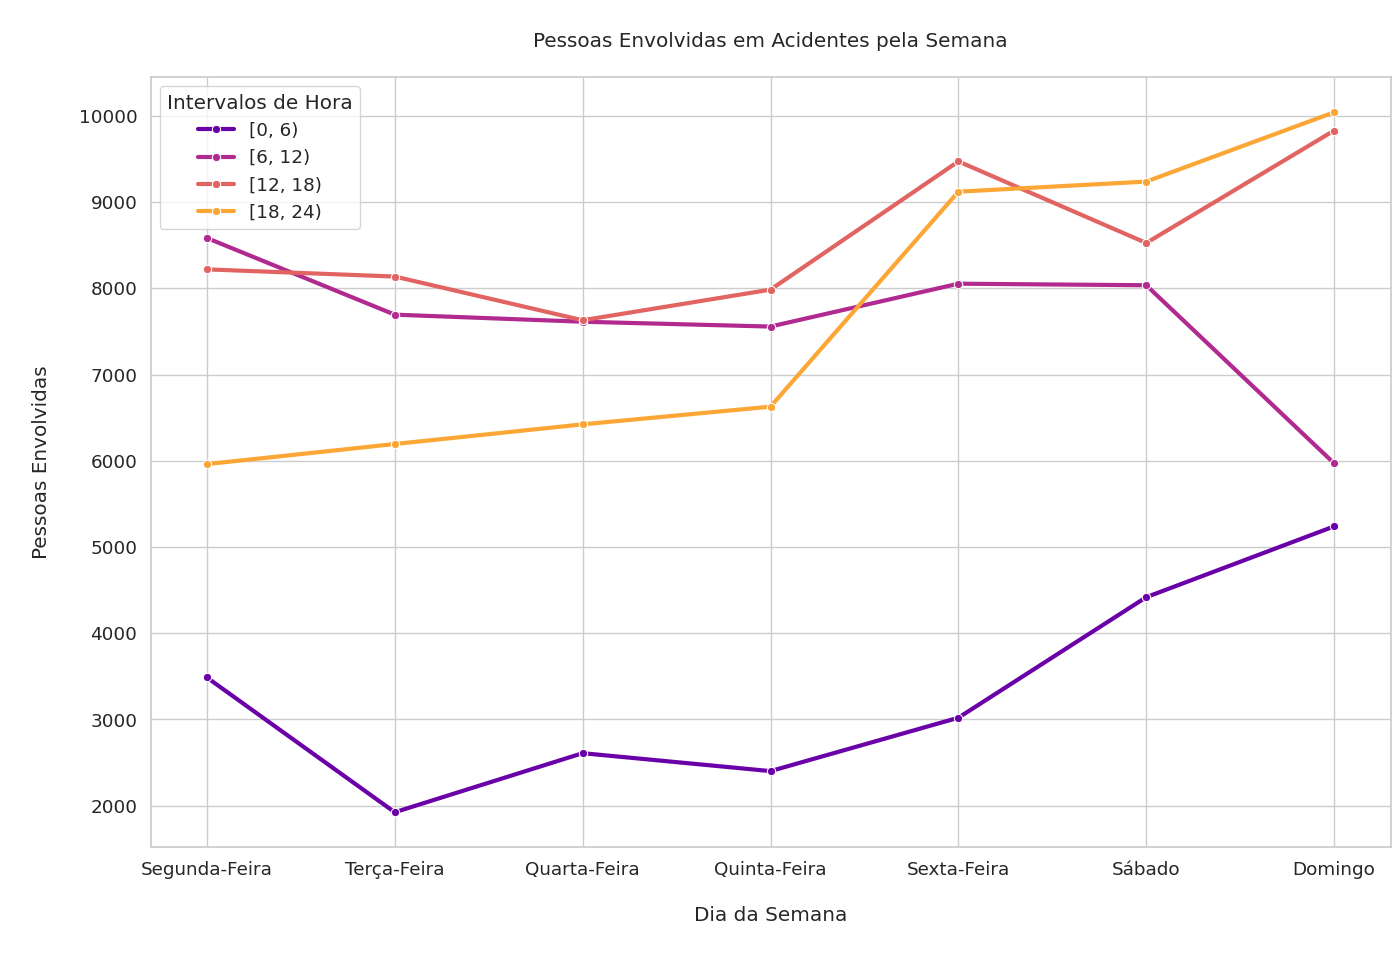

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(x='dia_semana',
             y='pessoas',
             hue='Intervalos de Hora',
             data=pessoas_dia_hora,
             palette='plasma',
             marker='o',
             linewidth=3)  # Aumenta a grossura das linhas
plt.xlabel("\nDia da Semana\n")
plt.ylabel("\nPessoas Envolvidas\n")
plt.title("\nPessoas Envolvidas em Acidentes pela Semana\n")
plt.legend(title='Intervalos de Hora', loc='upper left')

plt.show()


Ao longo da semana, entre 6h e 18h, os acidentes são mais comuns, provavelmente porque as pessoas estão indo e voltando do trabalho ou estudo. Mas no fim de semana pessoas saem pela noite, acarretando em acidentes. Por isso, sexta-feira e o fim de semana são os dias com mais acidentes.

# Pré-processamento de dados


In [ ]:
df_pred = df.drop(['Intervalos de Hora', 'causa_acidente', 'tipo_acidente', 'ignorados'], axis=1)

In [ ]:
df_pred['dia_semana'] = df_pred['dia_semana'].str.title()
df_pred['municipio'] = df_pred['municipio'].str.title()

In [ ]:
df_pred.head()

,dia_semana,uf,br,km,municipio,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,...,feridos_graves,ilesos,veiculos,fase_dia,Data e Hora,Ano,Mês,Dia,Hora,Minuto
0,Segunda-Feira,ES,101,38.0,Conceicao Da Barra,Crescente,Céu Claro,Simples,Reta,3,...,1,1,3,Plena Noite,2024-01-01 03:56:00,2024,1,1,3,56
1,Segunda-Feira,PI,343,185.0,Piripiri,Decrescente,Céu Claro,Simples,Reta,2,...,0,1,2,Amanhecer,2024-01-01 04:50:00,2024,1,1,4,50
2,Segunda-Feira,BA,116,578.0,Brejoes,Decrescente,Céu Claro,Simples,Curva,3,...,0,1,4,Plena Noite,2024-01-01 04:30:00,2024,1,1,4,30
3,Segunda-Feira,SE,101,18.0,Malhada Dos Bois,Crescente,Céu Claro,Dupla,Declive;Reta,2,...,1,0,3,Amanhecer,2024-01-01 06:30:00,2024,1,1,6,30
4,Segunda-Feira,MT,364,240.0,Rondonopolis,Crescente,Céu Claro,Dupla,Reta,3,...,0,2,3,Pleno dia,2024-01-01 05:00:00,2024,1,1,5,0


In [ ]:
# Definindo uma classe que adicionará alguns atributos e implementará os métodos fit e transform para posterior uso no Pipeline.
class adicionar_atributos(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        dados_ = X[['pessoas', 'veiculos', 'Data e Hora', 'km']].copy()

        dados_['Cod Hora'] = pd.cut(dados_['Data e Hora'].map(lambda x: x.hour), bins=range(0, 25, 6), labels=range(1, 5), right=False)
        dados_['Cod Dia'] = dados_['Data e Hora'].map(lambda x: x.dayofweek)
        dados_['Cod km'] = pd.cut(dados_['km'], bins=range(0, 1300, 100), labels=range(1, 13))

        dados_.drop(['Data e Hora', 'km'], axis=1, inplace=True)

        return dados_

In [ ]:
class adicionar_atributos(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        dados_ = X[['pessoas', 'veiculos', 'Data e Hora', 'km']].copy()

        dados_['Cod Hora'] = pd.cut(dados_['Data e Hora'].map(lambda x: x.hour), bins=range(0, 25, 6), labels=range(1, 5), right=False)
        dados_['Cod Dia'] = dados_['Data e Hora'].map(lambda x: x.dayofweek)
        dados_['Cod km'] = pd.cut(dados_['km'], bins=range(0, 1300, 100), labels=range(1, 13))

        dados_.drop(['Data e Hora', 'km'], axis=1, inplace=True)

        return dados_

In [ ]:
class valor_binario(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        dados_ = X.copy()

        return dados_.astype(bool).astype(int)

In [ ]:
pipeline_x_1 = ColumnTransformer([('num', Pipeline([('adicionar_atributos', adicionar_atributos()), ('escalonamento', StandardScaler())]), ['pessoas', 'veiculos', 'Data e Hora', 'km']), ('cat', OneHotEncoder(), ['uf', 'br', 'municipio', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via'])])
pipeline_y = Pipeline([('valor_binario', valor_binario())])

# Dividindo os dados de teste para regressão e classificação
----

Através da árvore de decisão será possível identificar quais são as features que mais determinam um ferido grave

In [ ]:
features = ['uf', 'br', 'municipio', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'pessoas', 'veiculos', 'Data e Hora', 'km']
X_set = df_pred[features]
target = ['feridos_graves']
y_set = df_pred[target]

X_set = pipeline_x_1.fit_transform(X_set)
y_set = pipeline_y.fit_transform(y_set)

/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Primeiramente vamos fazer Regressão com Árvore de decisão

In [ ]:
arvore_clf = DecisionTreeClassifier(random_state=0)
arvore_clf.fit(X_set, y_set)

DecisionTreeClassifier(random_state=0)

In [ ]:
extra_attribs = ['Cod Hora', 'Cod Dia', 'Cod km']

cat_encoder = pipeline_x_1.named_transformers_['cat'].categories_

cat_encoder_attribs = []
for i in range(len(cat_encoder)):
    cat_encoder_attribs.extend(list(cat_encoder[i]))

atributos = ['pessoas', 'veiculos'] + extra_attribs + cat_encoder_attribs

In [ ]:
pd.DataFrame(zip(arvore_clf.feature_importances_, atributos)).sort_values(by=0, ascending=False).head(20)


,0,1
3,0.129577,Cod Dia
2,0.064534,Cod Hora
0,0.037203,pessoas
1,0.036608,veiculos
1979,0.027602,Decrescente
1978,0.027281,Crescente
1982,0.022739,Céu Claro
2402,0.020791,Reta
1988,0.016115,Nublado
2052,0.011941,Curva


Portanto podemos dizer que o horario, pesssoas, veiculos e o sentido da via são grandes fatores para determinar um ferido grave depois de um acidente de transito

# Agora com as features importantes será possível focar nos targets

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_set, y_set)
y_pred_reg = reg_model.predict(X_set)

In [ ]:
class adicionar_atributos_importantes(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        dados_ = X[['pessoas', 'veiculos', 'Data e Hora']].copy()

        dados_['Cod Hora'] = pd.cut(dados_['Data e Hora'].map(lambda x: x.hour), bins=range(0, 25, 6), labels=range(1, 5), right=False)
        dados_['Cod Dia'] = dados_['Data e Hora'].map(lambda x: x.dayofweek)
        dados_.drop(['Data e Hora'], axis=1, inplace=True)

        return dados_

pipeline_x_2 = ColumnTransformer([('num', Pipeline([('adicionar_atributos_importantes', adicionar_atributos_importantes()), ('escalonamento', StandardScaler())]), ['pessoas', 'veiculos', 'Data e Hora']), ('cat', OneHotEncoder(), ['sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via'])])

In [ ]:
features_importantes = ['Data e Hora', 'pessoas', 'veiculos', 'sentido_via', 'tracado_via', 'condicao_metereologica', 'tipo_pista',]
X_set = df_pred[features_importantes]

In [ ]:
X_set = pipeline_x_2.fit_transform(X_set).toarray()

# Assim podemos formar conjuntos de treino e teste

In [ ]:
# Dividindo os dados em um conjunto de treino e um de teste.
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.1, random_state=0)

# Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7484964461454346
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      5699
           1       0.31      0.11      0.17      1617

    accuracy                           0.75      7316
   macro avg       0.55      0.52      0.51      7316
weighted avg       0.68      0.75      0.70      7316



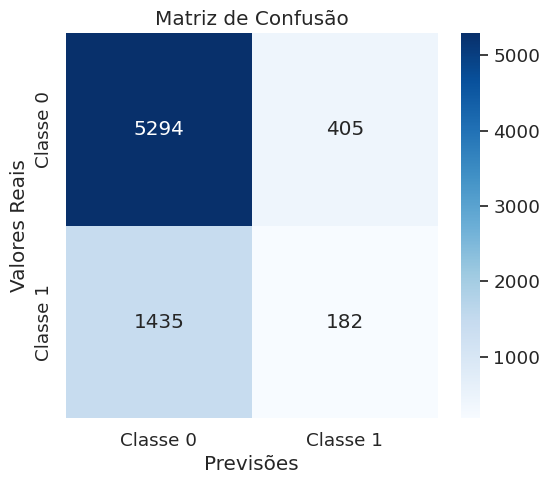

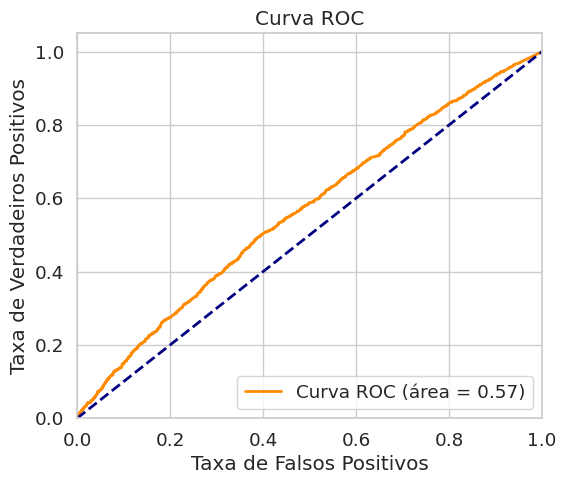

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      5699
           1       0.31      0.11      0.17      1617

    accuracy                           0.75      7316
   macro avg       0.55      0.52      0.51      7316
weighted avg       0.68      0.75      0.70      7316



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# 1. **Matriz de Confusão**
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# 3. **Curva ROC**
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# 4. **Métricas de Classificação**
from sklearn.metrics import classification_report
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))


# SVM para dimensionalidade (muito lento)
------
Este modelo apresentou problemas no runtime

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Inicializando o modelo
svm_model = SVC(random_state=0)

# Treinando o modelo
svm_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_svm = svm_model.predict(X_test)

# Avaliando o modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Vizinho mais próximo (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inicializando o modelo
knn_model = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo
knn_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliando o modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7333242208857299
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      5699
           1       0.28      0.13      0.18      1617

    accuracy                           0.73      7316
   macro avg       0.53      0.52      0.51      7316
weighted avg       0.67      0.73      0.69      7316



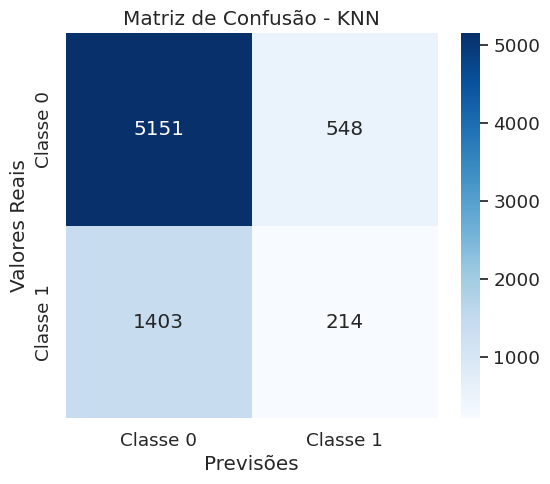

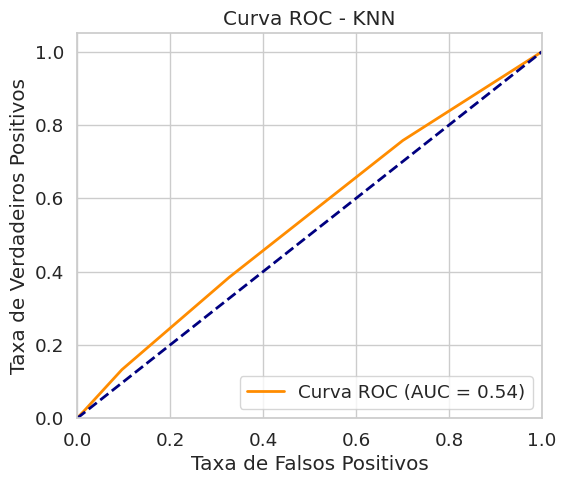

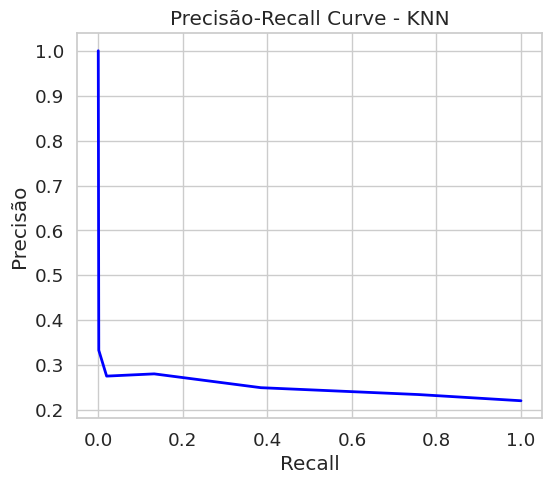

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      5699
           1       0.28      0.13      0.18      1617

    accuracy                           0.73      7316
   macro avg       0.53      0.52      0.51      7316
weighted avg       0.67      0.73      0.69      7316



In [ ]:
# 1. **Matriz de Confusão**
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - KNN')
plt.show()

# 2. **Curva ROC e AUC**
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 5))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - KNN')
plt.legend(loc='lower right')
plt.show()

# 3. **Precisão-Recall Curve**
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
plt.plot(recall_knn, precision_knn, color='blue', lw=2)
plt.title('Precisão-Recall Curve - KNN')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.show()

# 5. **Relatório de Classificação**
from sklearn.metrics import classification_report
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))


# Regressão Logistica

In [ ]:
lr_model = LogisticRegression(random_state=0)

# Treinando o modelo
lr_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_lr = lr_model.predict(X_test)

# Avaliando o modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.77843083652269
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      5699
           1       0.42      0.01      0.01      1617

    accuracy                           0.78      7316
   macro avg       0.60      0.50      0.44      7316
weighted avg       0.70      0.78      0.68      7316



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


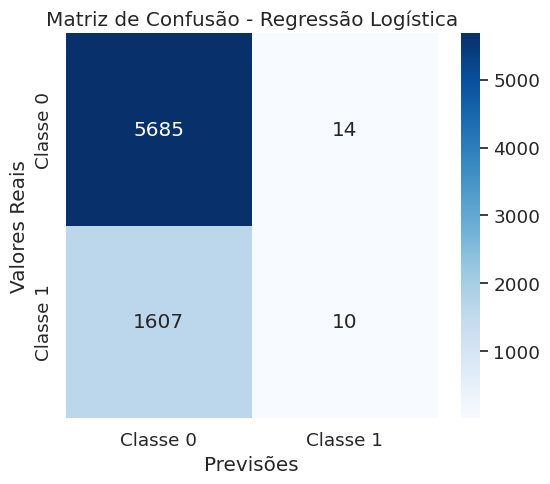

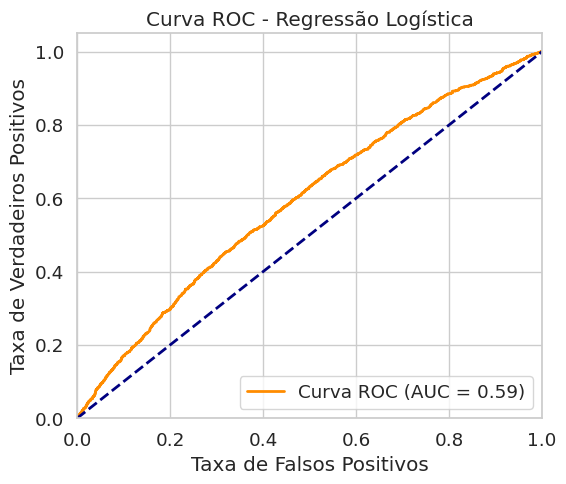

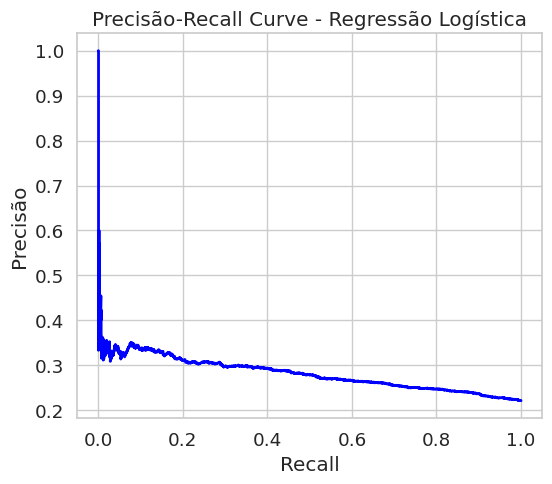

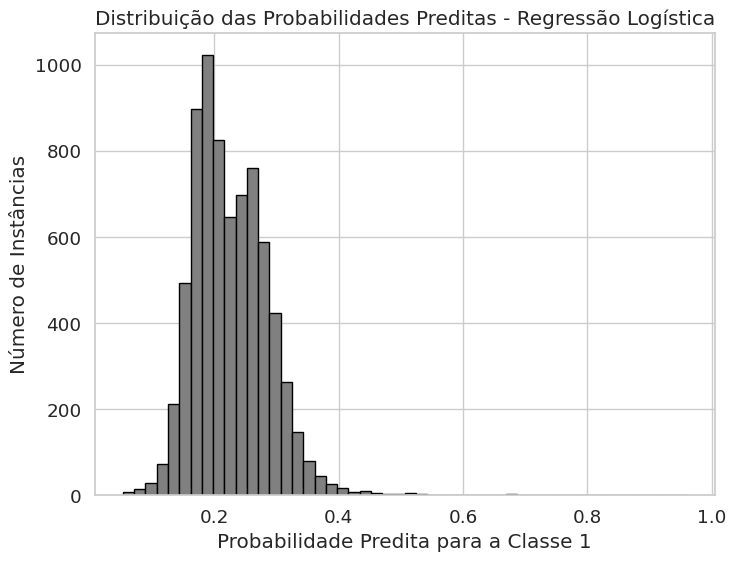

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      5699
           1       0.42      0.01      0.01      1617

    accuracy                           0.78      7316
   macro avg       0.60      0.50      0.44      7316
weighted avg       0.70      0.78      0.68      7316



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 1. **Matriz de Confusão**
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

# 2. **Curva ROC e AUC**
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.show()

# 3. **Precisão-Recall Curve**
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 5))
plt.plot(recall_lr, precision_lr, color='blue', lw=2)
plt.title('Precisão-Recall Curve - Regressão Logística')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.show()

# 4. **Distribuição das Probabilidades Preditas**
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
plt.figure(figsize=(8, 6))
plt.hist(y_prob_lr, bins=50, color='gray', edgecolor='black')
plt.title('Distribuição das Probabilidades Preditas - Regressão Logística')
plt.xlabel('Probabilidade Predita para a Classe 1')
plt.ylabel('Número de Instâncias')
plt.show()

# 5. **Relatório de Classificação**
from sklearn.metrics import classification_report
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr))


# Regressão linear


In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_reg)
print("Erro quadrático médio (MSE) para regressão:", mse)

mae = mean_absolute_error(y_test, y_pred_reg)
print("Erro médio absoluto (MAE) para regressão:", mae)
3
mape = mean_absolute_percentage_error(y_test, y_pred_reg)
print("Erro médio percentual absoluto (MAPE) para regressão:", mape)


Erro quadrático médio (MSE) para regressão: 0.17022112774574616
Erro médio absoluto (MAE) para regressão: 0.34088316228916266
Erro médio percentual absoluto (MAPE) para regressão: 780373912608589.6


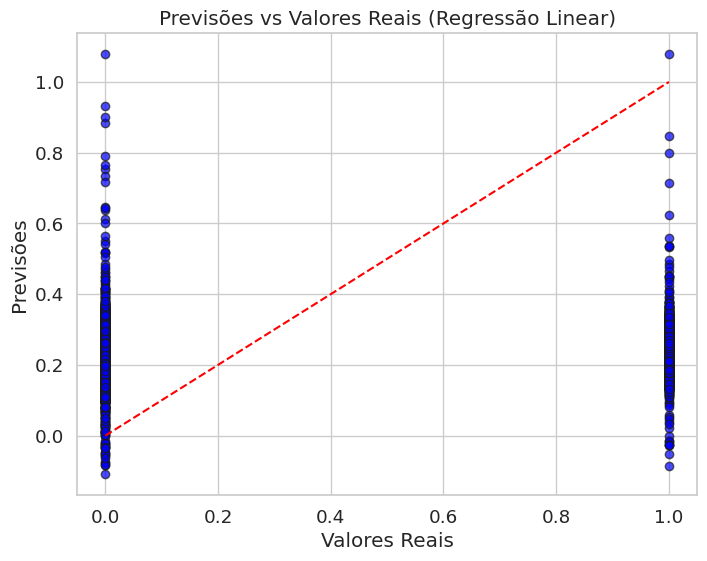

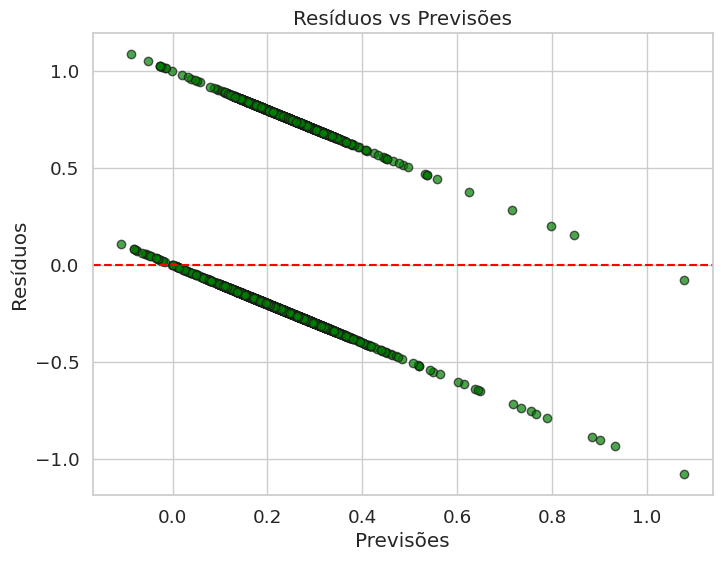

R²: 0.01
Erro Quadrático Médio (MSE): 0.17


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# 1. **Gráfico de Dispersão entre as Previsões e os Valores Reais**
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Linha de identidade
plt.title('Previsões vs Valores Reais (Regressão Linear)')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

# 2. **Gráfico de Resíduos**
residuos = y_test - y_pred_reg
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, residuos, color='green', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Linha de referência
plt.title('Resíduos vs Previsões')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

# 3. **Calculando o R² e o Erro Quadrático Médio (MSE)**
r2 = r2_score(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"R²: {r2:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")


# Plotando a linha de regressão


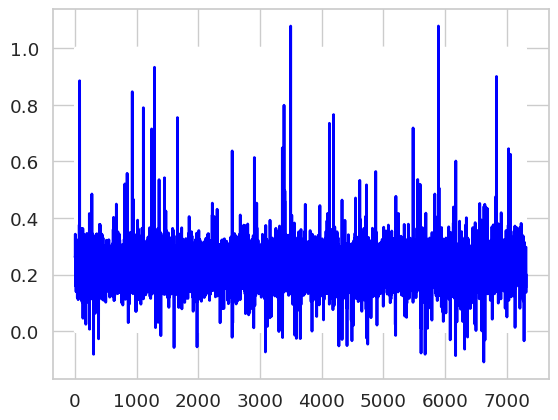

In [ ]:
plt.plot(range(0,len(y_pred_reg)), y_test, color='white', linewidth=2)
plt.plot(range(0,len(y_pred_reg)), y_pred_reg, color='blue', linewidth=2)
plt.show()